In [1]:
import pyart
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import wradlib
%matplotlib inline

filename='/home/martin/RadarMeteo/datos/EZE-PPIVol-20151222-225005.hdf'

/home/martin/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/martin/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/martin/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/martin/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the const

Conversor

In [2]:
from hdf5_to_cfrad import hdf5_to_cfrad

In [6]:
hdf5_to_cfrad(filename)

Levantamos el archivo para graficar

In [8]:
import pyart

path='/home/sofia/RadarMeteo/EZE-PPIVol-20151222-225005.nc'

radar=pyart.io.read(path)

Graficamos

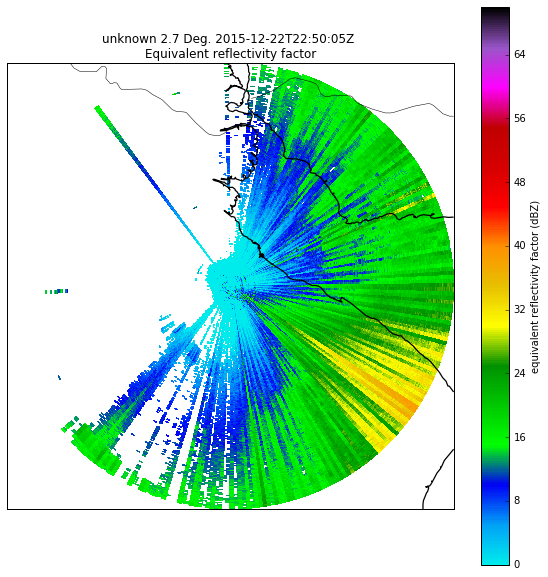

In [12]:
display = pyart.graph.RadarMapDisplay(radar)
fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
display.plot_ppi_map('TH',5, vmin=0, vmax=70, cmap=pyart.graph.cm.NWSRef)

Codigo Martin

In [10]:
radar.fields['TH']

ValueError: could not broadcast input array from shape (5221,480) into shape (5221)

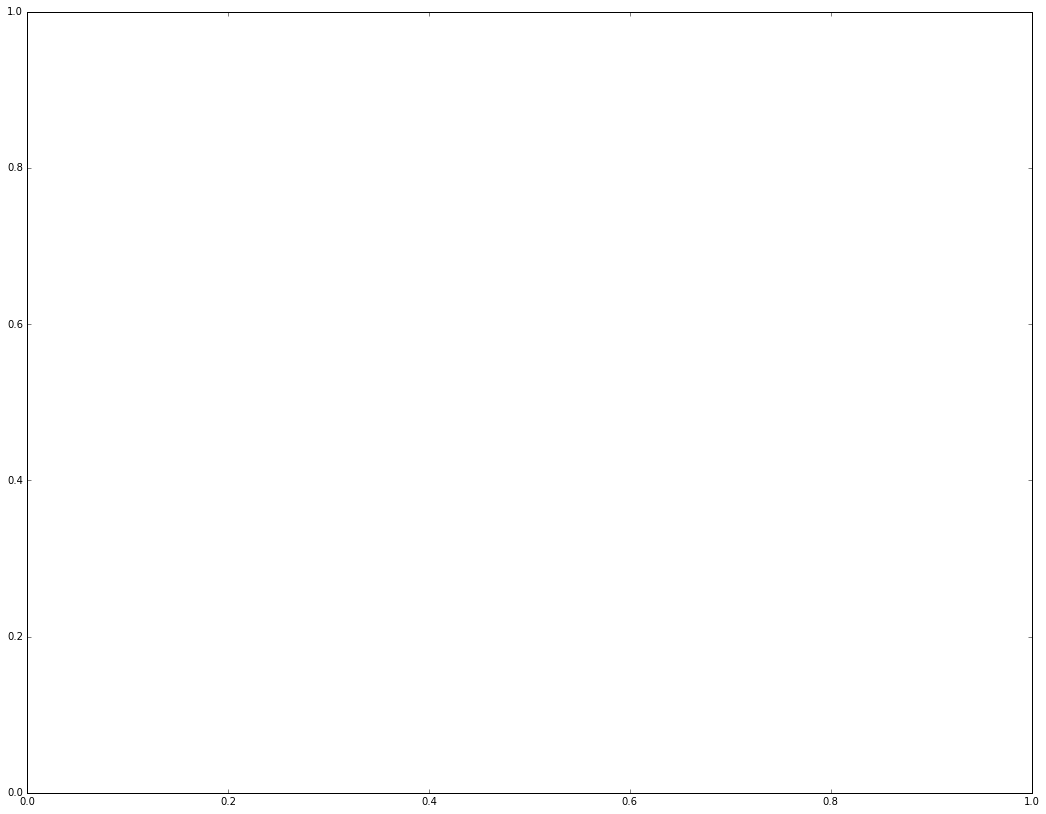

In [9]:
display = pyart.graph.RadarMapDisplay(radar)
fig =plt.figure(figsize=(18,14))
ax = fig.add_subplot(111)
display.plot_ppi_map('TH',5, vmin=0, vmax=70, cmap=pyart.graph.cm.NWSRef)

In [ ]:
raw = wradlib.io.read_OPERA_hdf5(filename)

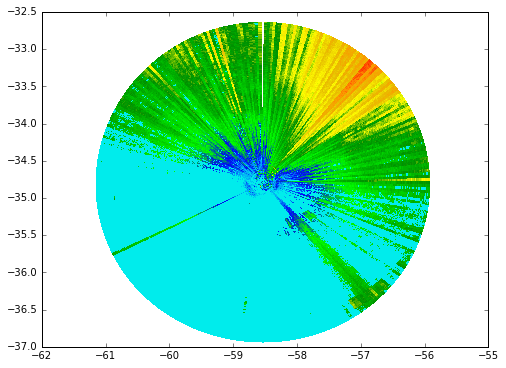

In [17]:
# Extraigo las coordenadas del sitio del radar (Lat/Lon y Altura)
sitecoords = (raw["where"]["lon"], raw["where"]["lat"],raw["where"]["height"])

# Extraigo la reflectividad horizontal [dBZ]
where = raw["dataset%d/where"%6]
what  = raw["dataset%d/data2/what"%6]
ref = what["offset"] + what["gain"] * raw["dataset%d/data1/data"%6]


startAZ = raw[u'dataset6/data1/how']['startazA']
stopAZ  = raw[u'dataset6/data1/how']['stopazA']
AZ = (startAZ + stopAZ)/2.0

# Georeferencing and projection
radar_location = (-58.536512, -34.787591, 57) # (lon, lat, alt) in decimal degree and meters
#elevation = 0.38452148 # in degree
elevation = raw[u'dataset6/where']['elangle']
azimuths = AZ # in degrees
ranges = np.arange(0, 240000., 500.) # in meters
polargrid = np.meshgrid(ranges, azimuths)
lon, lat, alt = wradlib.georef.polar2lonlatalt_n(polargrid[0], polargrid[1], elevation, radar_location)

# Grafico reflectividad PPI
fig=plt.figure(1,figsize=(8,6))
plt.pcolormesh(lon,lat,ref,vmin=-10,vmax=70,cmap=pyart.graph.cm.NWSRef)
plt.show()

In [14]:
ref

array([[-31.5, -31.5, -31. , ...,  18. ,  21.5,  19.5],
       [-31.5, -31.5, -31.5, ...,  15.5,  16. ,  15.5],
       [-31.5, -31.5, -31. , ...,  20.5,  20.5,  21. ],
       ..., 
       [-31.5, -31.5, -31.5, ..., -32. ,  14. , -32. ],
       [-31.5, -31.5, -31.5, ...,  22. ,  22. ,  22. ],
       [-31.5, -31.5, -28.5, ...,  20. ,  21. ,  21.5]])